In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('BigmacPrice.csv')

In [3]:
df.head(5)

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1946 non-null   object 
 1   currency_code  1946 non-null   object 
 2   name           1946 non-null   object 
 3   local_price    1946 non-null   float64
 4   dollar_ex      1946 non-null   int64  
 5   dollar_price   1946 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 91.3+ KB


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df_mean_price_per_country = df.groupby(['name'])[['dollar_price']].mean()
df_mean_price_per_country

,dollar_price
name,
Argentina,3.291892
Australia,4.823514
Austria,3.549130
Azerbaijan,4.094444
Bahrain,1.411111
...,...
United Arab Emirates,5.067778
United States,3.840541
Uruguay,4.162500


In [7]:
df_price_in_ukraine = df[df['name'] == 'Ukraine'].reset_index(drop=True)
df_price_in_ukraine.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2004-05-01,UAH,Ukraine,7.25,5,1.45
1,2005-06-01,UAH,Ukraine,7.25,5,1.45
2,2006-05-01,UAH,Ukraine,8.50,5,1.70
3,2007-01-01,UAH,Ukraine,9.00,5,1.80
4,2007-06-01,UAH,Ukraine,9.25,5,1.85


<AxesSubplot:xlabel='date'>

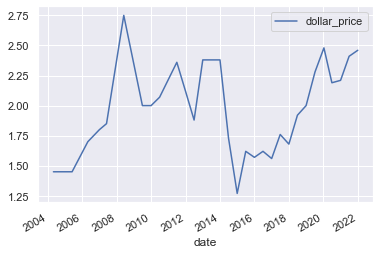

In [8]:
df_price_in_ukraine.plot.line(x="date", y="dollar_price")

In [9]:
df.count()

date             1946
currency_code    1946
name             1946
local_price      1946
dollar_ex        1946
dollar_price     1946
dtype: int64

In [10]:
df = df.drop_duplicates()
df = df.dropna()

df.count()

date             1946
currency_code    1946
name             1946
local_price      1946
dollar_ex        1946
dollar_price     1946
dtype: int64

<AxesSubplot:xlabel='dollar_price'>

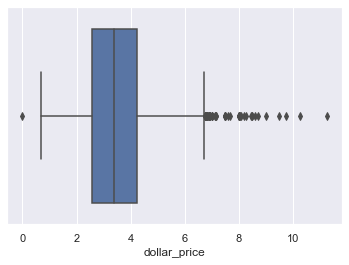

In [11]:
sns.boxplot(x=df['dollar_price'])

In [12]:
df_price_in_ukraine = df_price_in_ukraine.drop(['currency_code', 'name'], axis=1)
df_price_in_ukraine.head()

,date,local_price,dollar_ex,dollar_price
0,2004-05-01,7.25,5,1.45
1,2005-06-01,7.25,5,1.45
2,2006-05-01,8.50,5,1.70
3,2007-01-01,9.00,5,1.80
4,2007-06-01,9.25,5,1.85


,local_price,dollar_ex,dollar_price
local_price,1.000000,0.949738,0.263592
dollar_ex,0.949738,1.000000,-0.000305
dollar_price,0.263592,-0.000305,1.000000


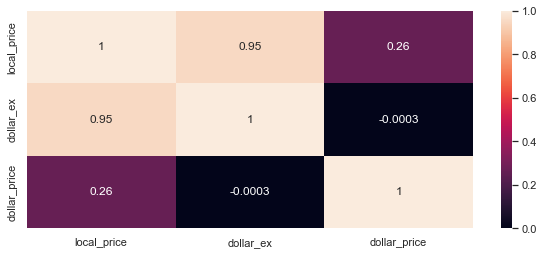

In [13]:
plt.figure(figsize=(10,4))
c = df_price_in_ukraine.corr()
sns.heatmap(c, annot=True)
c

<AxesSubplot:xlabel='local_price', ylabel='dollar_price'>

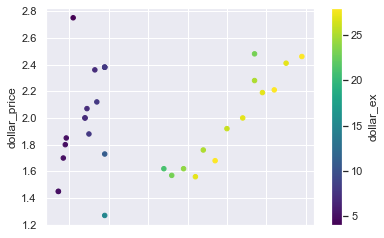

In [14]:
df_price_in_ukraine.plot.scatter(
    x='local_price', 
    y='dollar_price', 
    c='dollar_ex',
    colormap='viridis'
)